<a href="https://colab.research.google.com/github/kodeu/trading-prophet/blob/prophet_iter1/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnfb7llhz/vsv9tly5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnfb7llhz/na9d4avc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43989', 'data', 'file=/tmp/tmpnfb7llhz/vsv9tly5.json', 'init=/tmp/tmpnfb7llhz/na9d4avc.json', 'output', 'file=/tmp/tmpnfb7llhz/prophet_modeladozc276/prophet_model-20240518011110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Saving btcusdt_25_09_2017-1000.json to btcusdt_25_09_2017-1000 (18).json
User uploaded file "btcusdt_25_09_2017-1000 (18).json" with length 180772 bytes


01:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2017-09-26  3334.674946  2799.167713  5649.745018  3334.674946  3334.674946   
1 2017-09-27  3444.999022  2821.299096  5633.050337  3444.999022  3444.999022   
2 2017-09-28  3555.323098  2821.390177  5716.376048  3555.323098  3555.323098   
3 2017-09-29  3665.647174  2948.321840  5749.554276  3665.647174  3665.647174   
4 2017-09-30  3775.971250  3074.663452  5837.643548  3775.971250  3775.971250   

   additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0      866.426806            866.426806            866.426806  -6.751913   
1      818.264348            818.264348            818.264348   7.239086   
2      712.791074            712.791074            712.791074 -33.995380   
3      685.555929            685.555929            685.555929   4.260601   
4      630.046253            630.046253            630.046253  14.588312   

   weekly_lower  weekly_upper      yearly  yearly_lower 

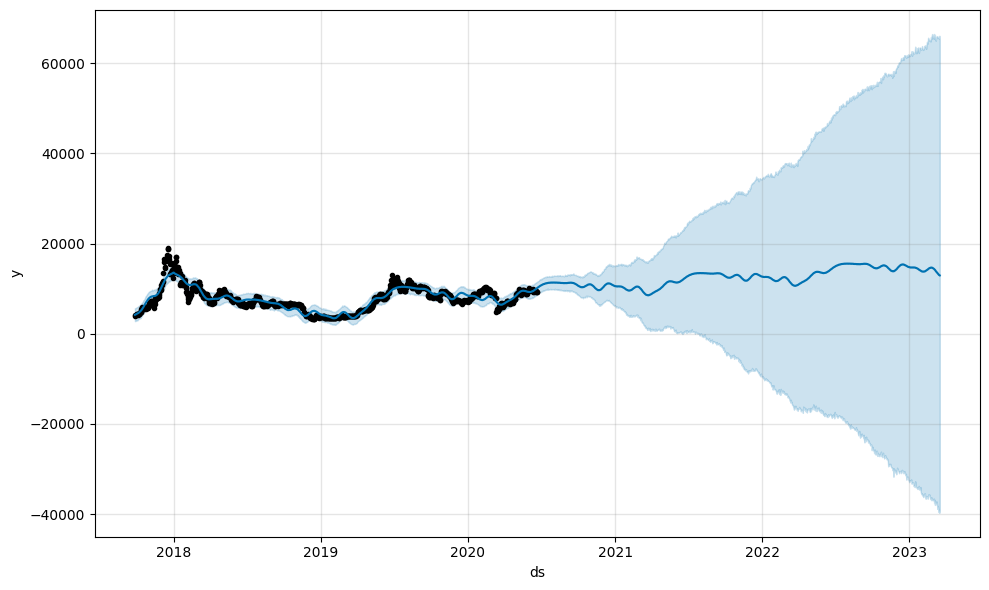

In [34]:
import numpy as np
import tensorflow as tf
import json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files
import pandas as pd
from prophet import Prophet
import datetime

dataext = []
data = []
uploaded = files.upload()
for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))
filename = list(uploaded.keys())[0]  # Adjust as per actual file name if needed


# Load the JSON data from the file
with open(filename, 'r') as file:
    rawdata = json.load(file)

rawdata = np.array(rawdata)
rawdata = rawdata[:, [6, 4]]
rawdata = rawdata.astype(np.float64)

#only keep close price and close date
rawdata_df = pd.DataFrame(rawdata)
rawdata_df.columns = ['ds','y']
rawdata_df['ds'] = pd.to_datetime(rawdata_df['ds'], unit='ms')
rawdata_df['ds'] = rawdata_df['ds'].dt.strftime('%Y-%m-%d')

# Initialize the model
model = Prophet()

# Fit the model
model.fit(rawdata_df)

# Create a DataFrame for future dates
future = model.make_future_dataframe(periods=1000)

# Predict future values
forecast = model.predict(future)
print(forecast.head())
# Plot the forecast
fig = model.plot(forecast)
